In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import pandas as pd

dataset = pd.read_csv('deals.csv')

In [84]:
payment_mapping = {'cash': 0, 'credit card': 1, 'cheque': 2}
dataset['Payment Method'] = dataset['Payment Method'].replace(payment_mapping)

label_mapping = {'yes': 0, 'no': 1}
dataset['Future Customer'] = dataset['Future Customer'].replace(label_mapping)

X = dataset.iloc[:, [0,2]].values
y = dataset.iloc[:, -1].values

<ipython-input-84-f05e413cc715>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Payment Method'] = dataset['Payment Method'].replace(payment_mapping)
<ipython-input-84-f05e413cc715>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Future Customer'] = dataset['Future Customer'].replace(label_mapping)


In [85]:
print(X)

[[64.  1.]
 [35.  2.]
 [25.  1.]
 ...
 [20.  1.]
 [19.  1.]
 [24.  1.]]


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 87  34]
 [ 20 109]]


<ipython-input-91-2dd1605a3794>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


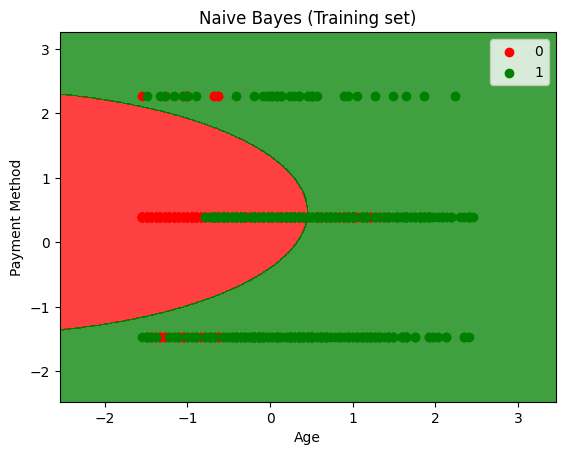

In [91]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Payment Method')
plt.legend()
plt.show()

<ipython-input-92-49e49b1a9e53>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


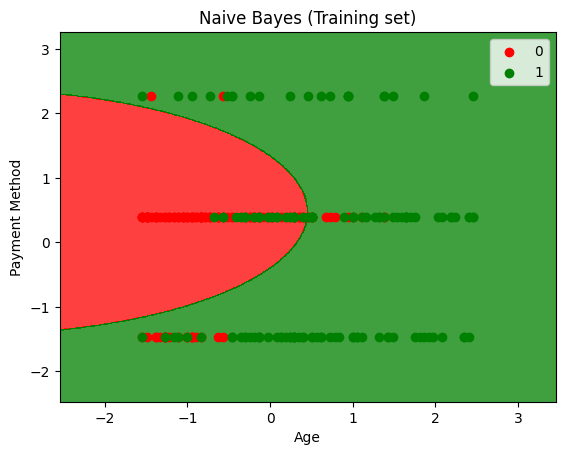

In [92]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Payment Method')
plt.legend()
plt.show()